# Loan status analysis based on bivariate and multivariate analysis

## Problem statement : Analyse Loan data, and predict the relation of the loan_status with the other columns, like intrest rate, home ownership type and recommend the way to reduce the risk in loan approvement.

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
sns.set_theme(style="ticks", color_codes=True)
cm = sns.light_palette("red", as_cmap=True)

## This  how we load the load csv

In [290]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

#### Checking datatype of the dataset

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### As there are 111 columns lets try to find how many of them can be deleted

In [292]:
df.isnull().sum() / df.count()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000983
tot_hi_cred_lim                    inf
total_bal_ex_mort                  inf
total_bc_limit                     inf
total_il_high_credit_limit         inf
Length: 111, dtype: float64

#### Delete the columns having null values more than 40%

In [293]:
result = df.isnull().sum() / df.count() > 0.50
for pair in zip(result.index, list(result)):
    index, isAlmostNull = pair
    if isAlmostNull:
        del df[index]
        
df.head()
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


#### We can see now there are only 53 columns left when we deleted all the columns having mostly null values

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Lets add correct data type of int_rate

In [295]:
import re

def cleanIntRate(intRate):
    newIntRate = re.sub(r'%+', '', str(intRate))
    if len(newIntRate):
        return float(newIntRate)
    
    return 0

df['int_rate'] = df['int_rate'].apply(cleanIntRate)
print(df['int_rate'].head(10))
df['int_rate'].describe()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64


count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

#### Fill null values in int_rate with the most occuring value

In [296]:
df['int_rate'].mode()

0    10.99
Name: int_rate, dtype: float64

In [297]:
df['int_rate'].fillna(df['int_rate'].mode(), inplace=True)

### Creating the categorical data out of the int_rate column

In [298]:
np.quantile(df['int_rate'], 0.25)

9.25

In [299]:
np.quantile(df['int_rate'], 0.50)

11.86

In [300]:
np.quantile(df['int_rate'], 0.75)

14.59

In [301]:
def createCategorical(int_rate):
    if int_rate <= 9.25:
        return 'low'
    elif int_rate <= 11.86:
        return 'mid'
    else:
        return 'high'

df['int_rate_category'] = df['int_rate'].apply(createCategorical)
df['int_rate_category'].head(10)

0     mid
1    high
2    high
3    high
4    high
5     low
6    high
7    high
8    high
9    high
Name: int_rate_category, dtype: object

### Uivariate and Multivariate analysis for the `int_rate_category` and `int_rate`

Text(0.5, 0, 'Loan status with interest category')

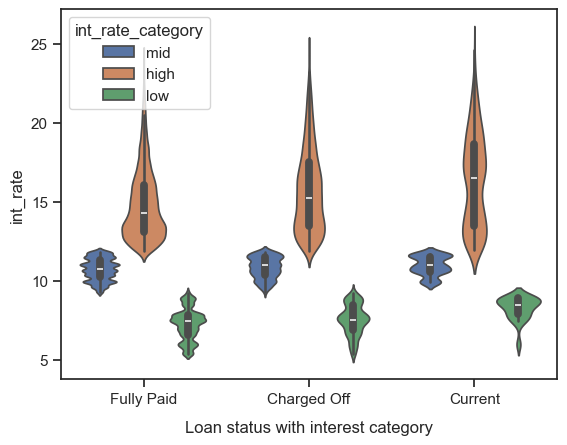

In [302]:
plot = sns.violinplot(df, y='int_rate', x='loan_status', hue=df['int_rate_category'])
plot.set_xlabel('Loan status with interest category', labelpad=10)

Text(0.5, 0, 'Loan application ID')

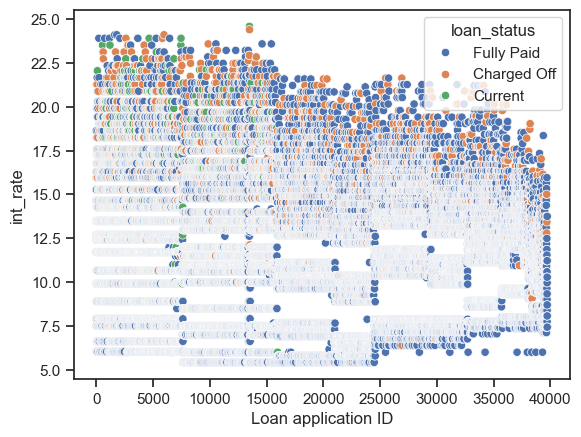

In [303]:
plot = sns.scatterplot(df, y='int_rate', x=df.index, hue=df['loan_status'])
plot.set_xlabel('Loan application ID')

In [304]:
df['int_rate_category'].value_counts()

high    19482
mid     10208
low     10027
Name: int_rate_category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='int_rate_category'>

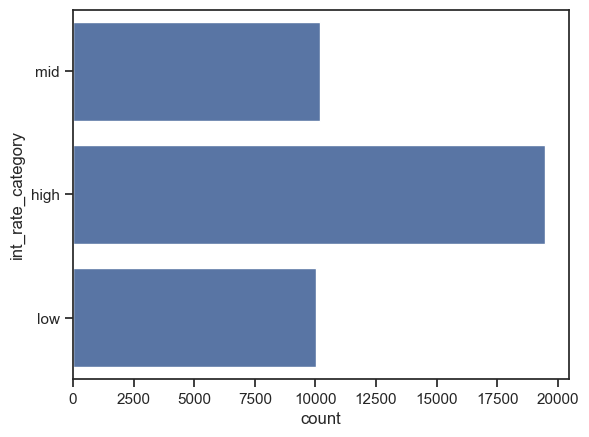

In [305]:
sns.countplot(df['int_rate_category'])

#### Observations

* Loan users tends to default when interest rate is higher.
* `Charged off` status rows in the dataset have the higer median (`int_rate`) than the other loan status data. 

### Uivariate and Bivariabte analysis for the `loan_status` with the other columns.

In [306]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

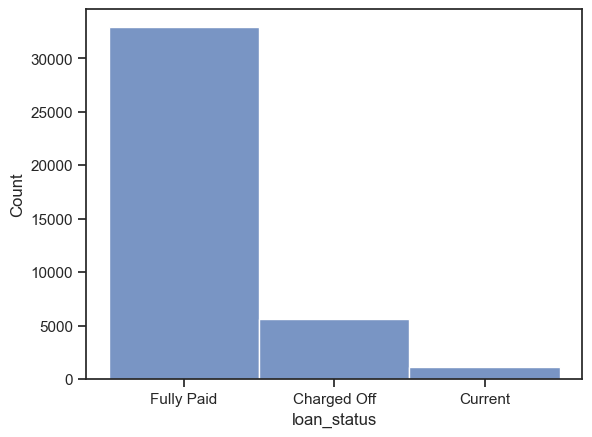

In [307]:
sns.histplot(df['loan_status'])

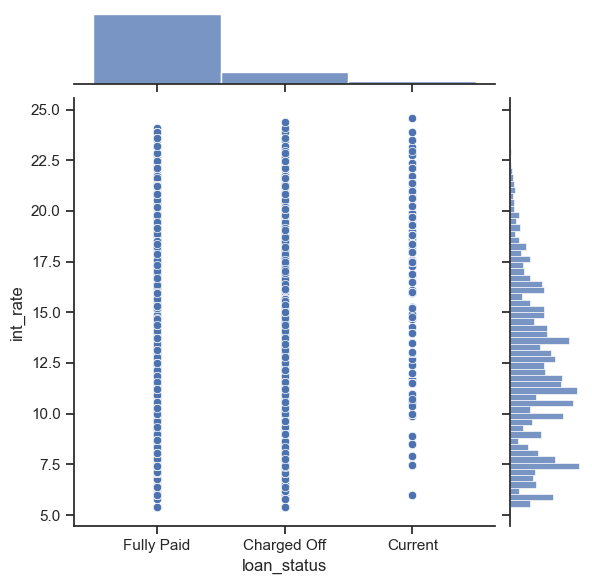

In [308]:
sns.jointplot(df, x='loan_status', y='int_rate')

In [309]:
df.pivot_table(values=['int_rate'], index=['loan_status'], aggfunc=np.median)

,int_rate
loan_status,
Charged Off,13.61
Current,14.65
Fully Paid,11.49


<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

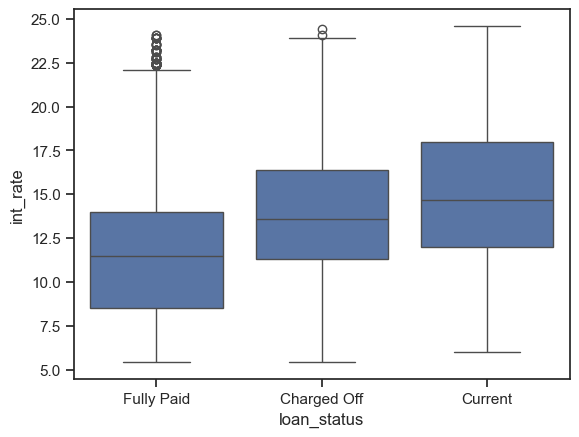

In [310]:
sns.boxplot(x=df.loan_status, y=df.int_rate)

##### `loan_status` and `loan_amount` lets do the analysis on this.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

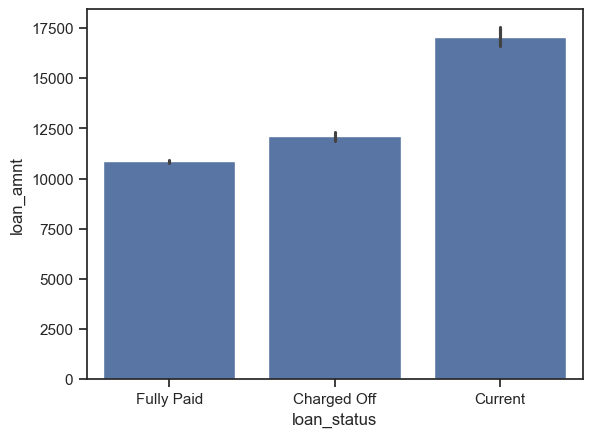

In [311]:
sns.barplot(y=df.loan_amnt, x=df.loan_status)

In [312]:
df.pivot_table(index='loan_status', columns="int_rate_category", values="loan_amnt", aggfunc='median')

int_rate_category,high,low,mid
loan_status,,,
Charged Off,12000,7000,9225
Current,16000,12000,14300
Fully Paid,10000,7500,9300


<AxesSubplot:xlabel='int_rate_category', ylabel='loan_status'>

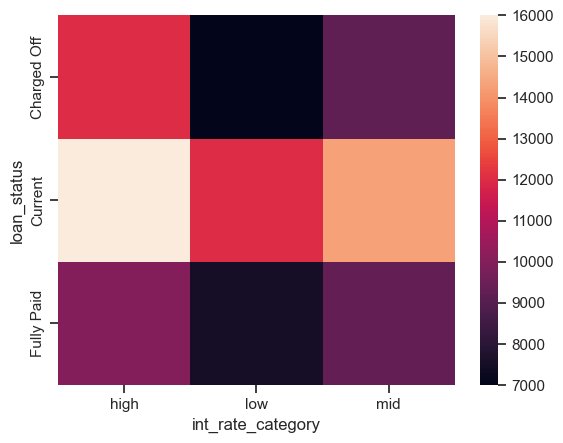

In [313]:
sns.heatmap(df.pivot_table(index=['loan_status'], columns=['int_rate_category'], values="loan_amnt", aggfunc=np.median))

<AxesSubplot:xlabel='int_rate_category', ylabel='loan_status'>

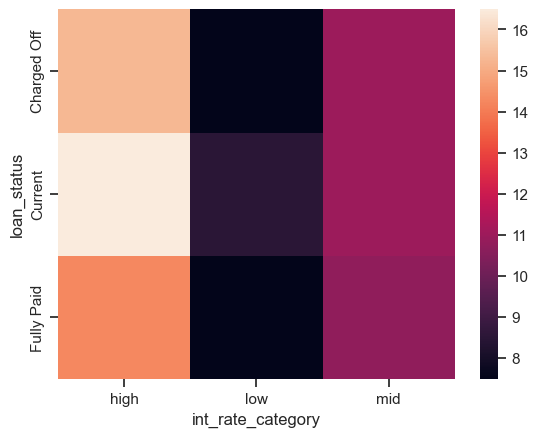

In [314]:
sns.heatmap(df.pivot_table(index=['loan_status'], columns=['int_rate_category'], values="int_rate", aggfunc=np.median))

In [315]:
df.groupby(['int_rate_category', 'loan_status']).size()

int_rate_category  loan_status
high               Charged Off     3835
                   Current          881
                   Fully Paid     14766
low                Charged Off      600
                   Current           42
                   Fully Paid      9385
mid                Charged Off     1192
                   Current          217
                   Fully Paid      8799
dtype: int64

Text(0, 0.5, 'Count')

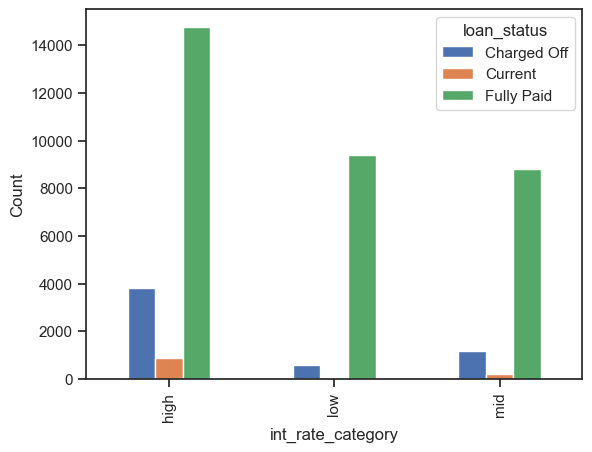

In [316]:
plot = df.groupby(['int_rate_category', 'loan_status']).size().unstack().plot.bar()
plot.set_ylabel('Count')

##### Observations

* When intrest rate is high, there are more number of people who default on loan
* Peple tend to take more amount, when interest rate is higher.

#### Bivariate with the `annual_inc` and `loan_status`

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

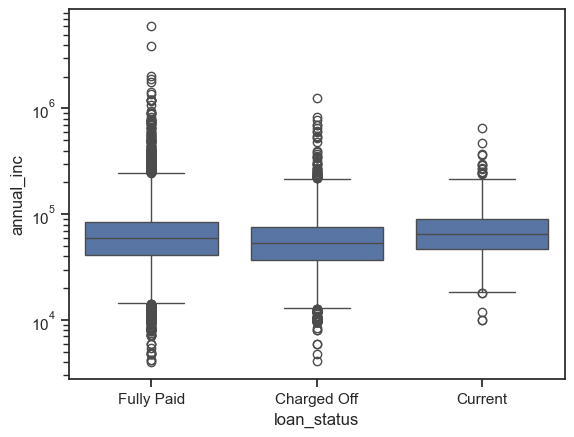

In [317]:
sns.boxplot(df, x='loan_status', y='annual_inc', log_scale=True)

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

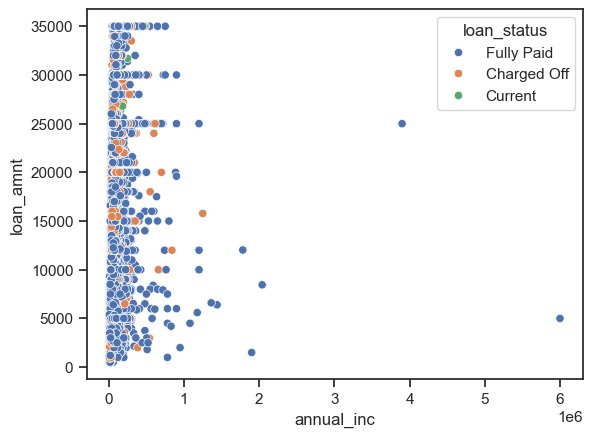

In [318]:
sns.scatterplot(df, x='annual_inc', y='loan_amnt', hue=df['loan_status'])

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

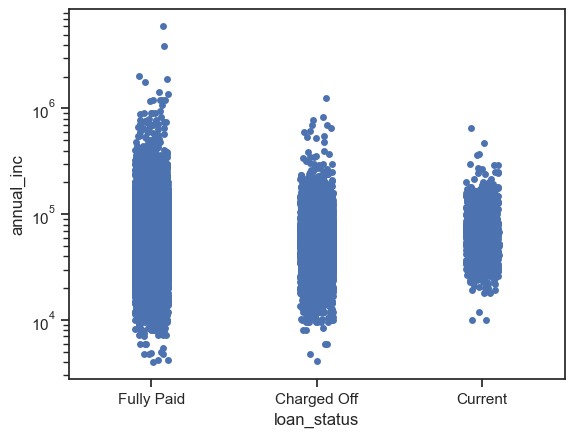

In [319]:
sns.stripplot(df, x='loan_status', y='annual_inc', log_scale=True)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

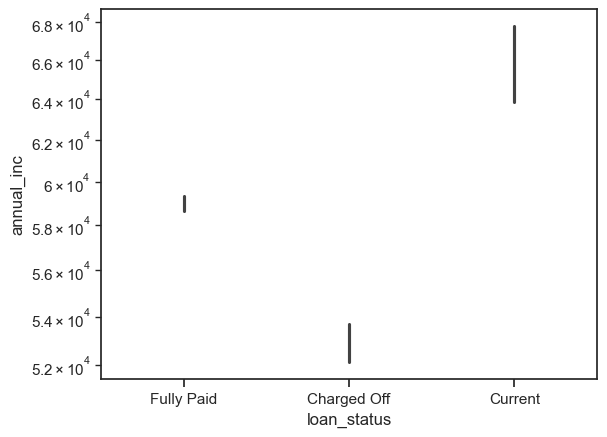

In [320]:
sns.barplot(df, x='loan_status', y='annual_inc', log_scale=True)

In [321]:
loan_status_int_annual_inc_table = df.pivot_table(index=['loan_status', 'int_rate_category'], values='annual_inc', aggfunc=np.median)
loan_status_pivot_table.style.background_gradient(cmap=cm)

Text(47.24999999999999, 0.5, 'Loan status')

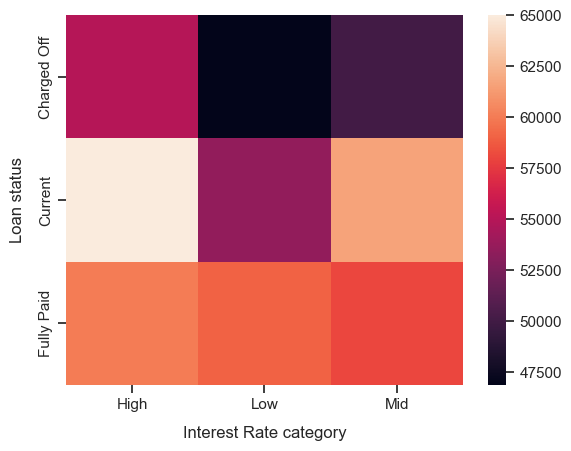

In [322]:
plot_axis = sns.heatmap(loan_status_int_annual_inc_table.unstack(), xticklabels=['High', 'Low', 'Mid'])
plot_axis.set_xlabel('Interest Rate category', labelpad=10)
plot_axis.set_ylabel('Loan status', labelpad=10)

<AxesSubplot:xlabel='loan_status,int_rate_category'>

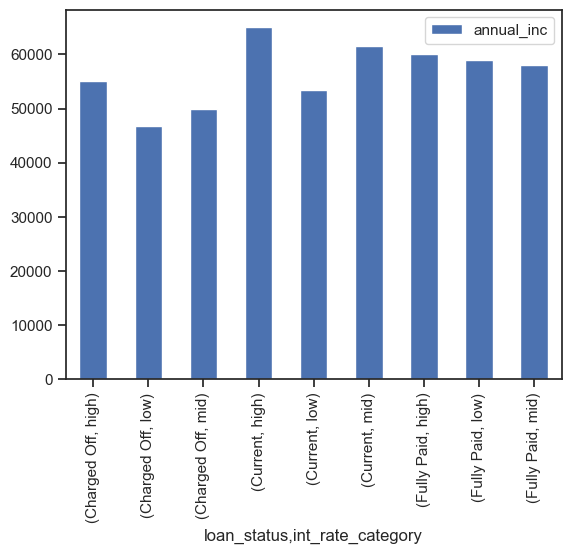

In [323]:
loan_status_int_annual_inc_table.plot.bar()

##### Observations

* When applicatants takes loan on high interest and having lower than median annual inc compared to the people who takes high interest loan and paids fully.

#### Bivariate analysis with the `loan_status` and `home_ownership`

In [324]:
loan_status_pivot_table = df.pivot_table(index=['home_ownership', 'loan_status'], values="member_id", aggfunc='count')
loan_status_pivot_table.style.background_gradient(cmap=cm)

<AxesSubplot:xlabel='home_ownership'>

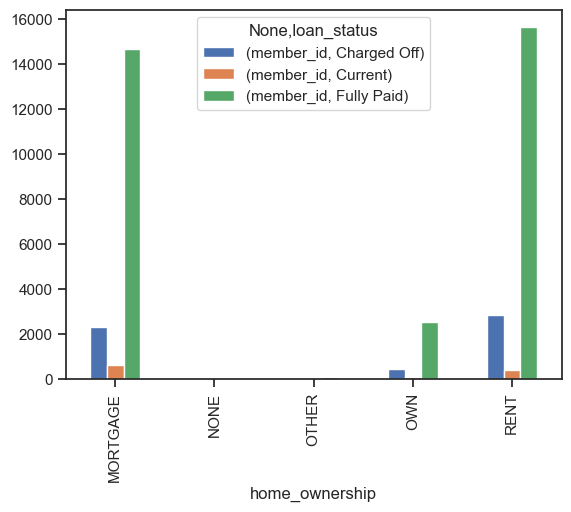

In [325]:
loan_status_pivot_table.unstack().plot.bar()

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

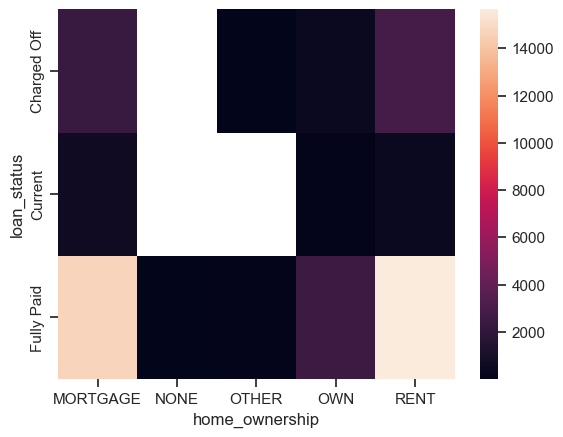

In [326]:
sns.heatmap(df.pivot_table(index=['loan_status'], columns=['home_ownership'], values="member_id", aggfunc='count'))

In [327]:
people_on_rent = df[df['home_ownership'].isin(('RENT', 'MORTGAGE'))]
people_on_rent.groupby(['loan_status', 'int_rate_category']).size()

loan_status  int_rate_category
Charged Off  high                  3528
             low                    546
             mid                   1092
Current      high                   823
             low                     38
             mid                    196
Fully Paid   high                 13672
             low                   8565
             mid                   8098
dtype: int64

##### Observations

* People having house ownership equal to `RENT` tend to default on loan
* People having house ownership euqal to `RENT` and `MORTAGE` tend to take loan on `high` interest rate and tend to default more.

#### Bivariate analysis with the `loan_status` and installment `term`

In [328]:
df.groupby(['term', 'loan_status']).size()

term        loan_status
 36 months  Charged Off     3227
            Fully Paid     25869
 60 months  Charged Off     2400
            Current         1140
            Fully Paid      7081
dtype: int64

<AxesSubplot:xlabel='term'>

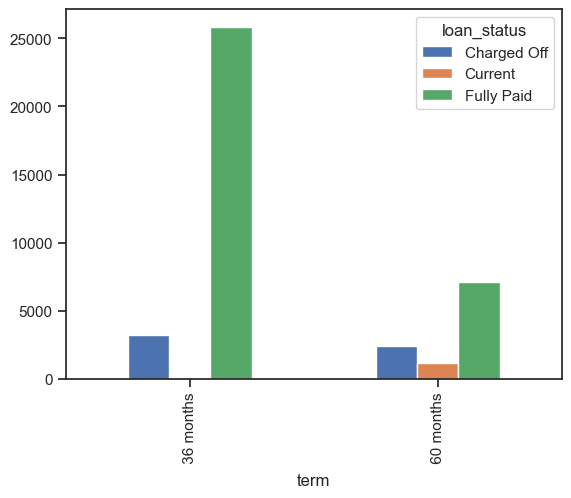

In [329]:
df.groupby(['term', 'loan_status']).size().unstack().plot.bar()

#### Bivariate analysis with the `loan_status` and `installment`

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

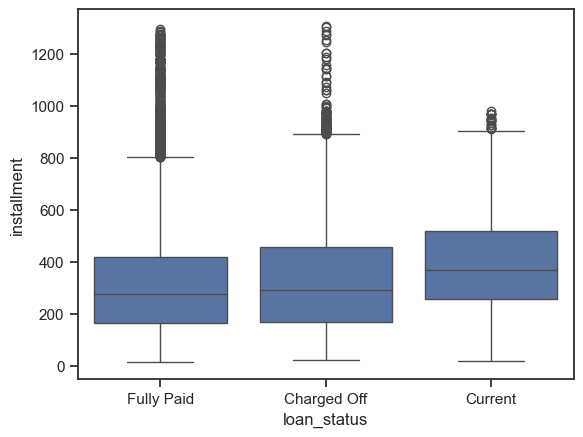

In [330]:
sns.boxplot(df, x='loan_status', y='installment', log_scale=False)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

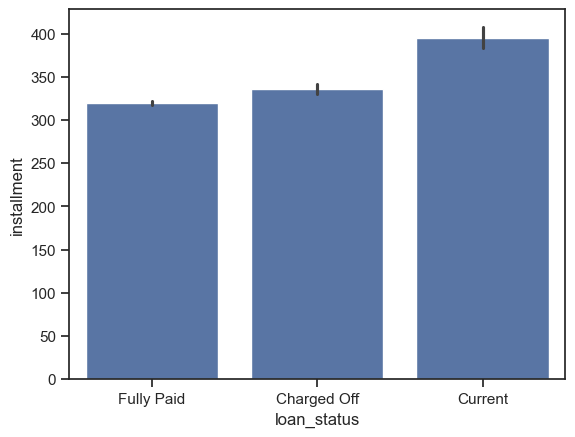

In [331]:
sns.barplot(df, x='loan_status', y='installment')

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

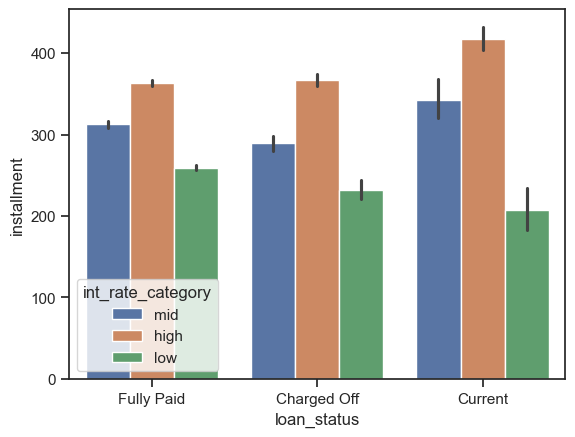

In [332]:
sns.barplot(df, x='loan_status', y='installment', hue=df['int_rate_category'])

In [333]:
term_installment_loan_status_table = df.pivot_table(index=['loan_status'], columns=['term'], values=['installment'], aggfunc=np.median)
term_installment_loan_status_table

installment           
term          36 months  60 months
loan_status                       
Charged Off      259.57     345.59
Current             NaN     368.19
Fully Paid       262.21     317.04

Text(0.5, 20.049999999999997, 'Installment')

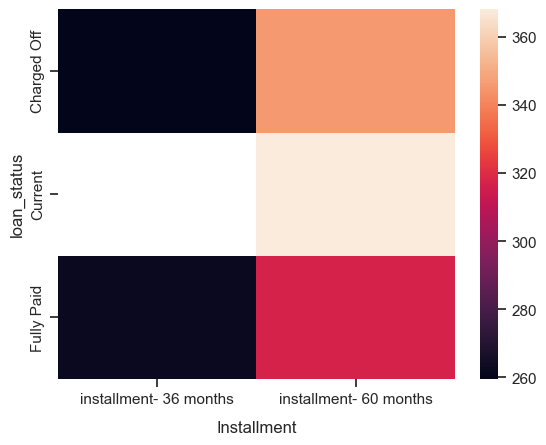

In [334]:
ax = sns.heatmap(term_installment_loan_status_table)
ax.set_xlabel('Installment', labelpad=10)

Text(0, 0.5, 'Installment')

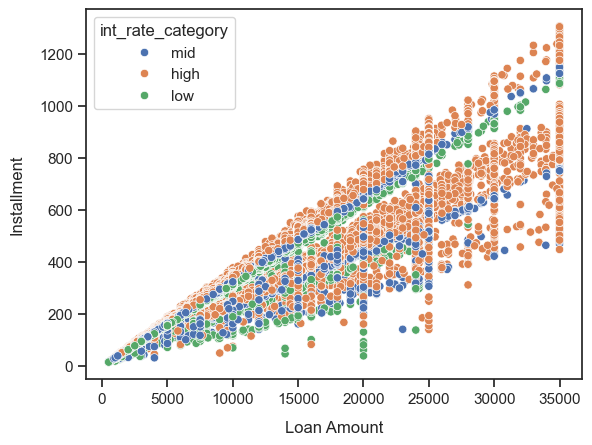

In [335]:
higher_term_charged_off = df[(df['term'] == ' 60 months') & df['loan_status'].isin(['Charged Off'])]
plot = sns.scatterplot(df, x='loan_amnt', y='installment', hue=df['int_rate_category'])
plot.set_xlabel('Loan Amount', labelpad=10)
plot.set_ylabel('Installment', labelpad=10)

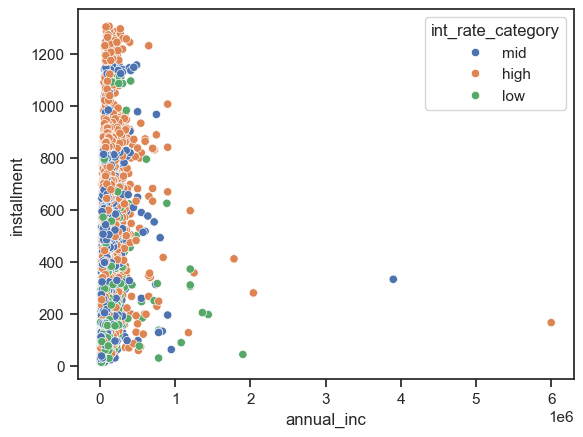

In [336]:
plot = sns.scatterplot(df, x='annual_inc', y='installment', hue=df['int_rate_category'])

##### Observations
* When people take loan on `60 months` term and higher installment amount tends to default more.
* People take loan on `60 months` term and higher interest rate and high installment payment and tend default more.

#### Bivariate Analysis of `loan_status` and `purpose`

In [337]:
loan_status_purpose_table = df.pivot_table(index=['loan_status'], columns=['purpose'], values='member_id', aggfunc='count')
loan_status_purpose_table.unstack()
loan_status_purpose_table

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,160.0,542.0,2767.0,56.0,347.0,59.0,222.0,106.0,92.0,633.0,19.0,475.0,53.0,96.0
Current,50.0,103.0,586.0,NaN,101.0,14.0,37.0,12.0,7.0,128.0,1.0,74.0,6.0,21.0
Fully Paid,1339.0,4485.0,15288.0,269.0,2528.0,308.0,1928.0,575.0,484.0,3232.0,83.0,1279.0,322.0,830.0


<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

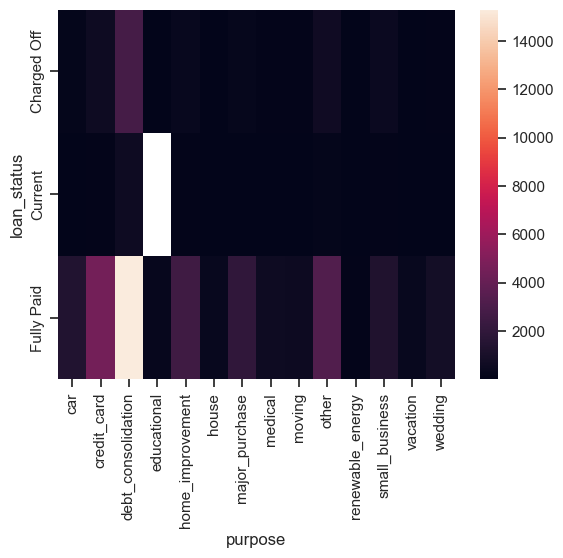

In [338]:
sns.heatmap(loan_status_purpose_table)

##### `loan_status`, `purpose`, and `int_rate` analysis

int_rate
purpose            loan_status          
car                Charged Off    11.710
                   Current        11.850
                   Fully Paid     10.000
credit_card        Charged Off    13.350
                   Current        15.270
                   Fully Paid     11.120
debt_consolidation Charged Off    14.170
                   Current        14.790
                   Fully Paid     11.860
educational        Charged Off    12.530
                   Fully Paid     11.490
home_improvement   Charged Off    13.110
                   Current        13.490
                   Fully Paid     10.950
house              Charged Off    15.270
                   Current        12.740
                   Fully Paid     11.475
major_purchase     Charged Off    13.110
                   Current        12.990
                   Fully Paid     10.380
medical            Charged Off    13.360
                   Current        15.380
                   Fully Paid     10.990
moving             Charged Off    11.490
                   Current        14.790
                   Fully Paid     11.110
other              Charged Off    13.490
                   Current        13.990
                   Fully Paid     11.360
renewable_energy   Charged Off    11.360
                   Current        11.490
                   Fully Paid     10.990
small_business     Charged Off    13.990
                   Current        16.490
                   Fully Paid     12.210
vacation           Charged Off    11.490
                   Current        11.240
                   Fully Paid     10.590
wedding            Charged Off    13.290
                   Current        16.770
                   Fully Paid     11.490

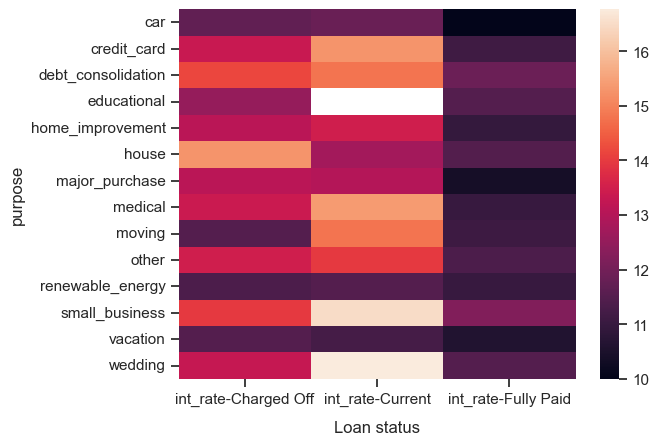

In [339]:
table = df.pivot_table(index=['purpose', 'loan_status'], values=['int_rate'], aggfunc=np.median)
plot = sns.heatmap(table.unstack())

plot.set_xlabel('Loan status', labelpad=10)
table

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

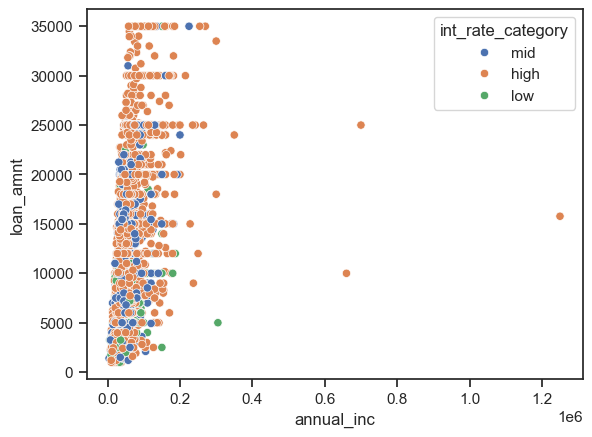

In [340]:
charged_off_debt_consolidation = df[(df['loan_status'].isin(['Charged Off'])) & df['purpose'].isin(['debt_consolidation'])]
sns.scatterplot(charged_off_debt_consolidation, x='annual_inc', y='loan_amnt', hue=df['int_rate_category'])

##### Observations
* People default more when purpose is `debt_consolidation` and tend to take loan on higher int_rate, even when income is on lower side.

#### Bivariate analysis for `verification_status` and `loan_status`

In [341]:
verification_and_loan_status_table = df.pivot_table(index=['loan_status'], values='member_id', columns='verification_status', aggfunc='count')
verification_and_loan_status_table

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Current,227,310,603
Fully Paid,14552,8243,10155


<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

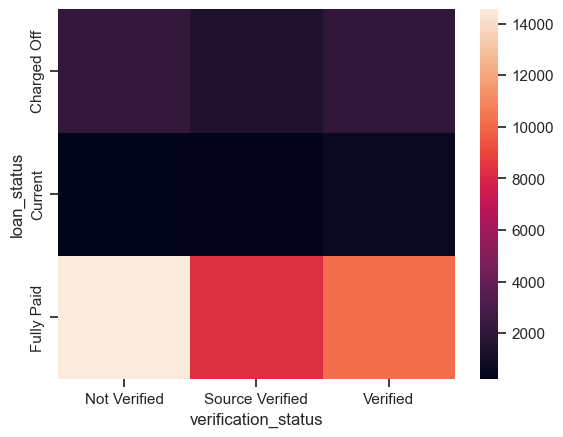

In [342]:
sns.heatmap(verification_and_loan_status_table)

<AxesSubplot:xlabel='verification_status'>

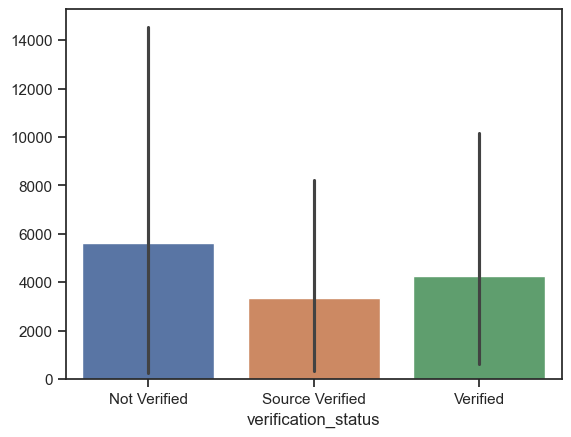

In [343]:
sns.barplot(verification_and_loan_status_table)

## Multi Variate analysis

#### Of `loan_status` with other columns like `installment`, `term`, `annual_inc`, `home_ownership`, `int_rate`, `purpose`, `loan_amount`, `int_rate_category`, `verification_status`

In [344]:
df_subset = df[['loan_status', 'installment', 'term', 'annual_inc', 'home_ownership', 'int_rate', 'purpose', 'loan_amnt', 'int_rate_category', 'verification_status']]
df_subset.head()

,loan_status,installment,term,annual_inc,home_ownership,int_rate,purpose,loan_amnt,int_rate_category,verification_status
0,Fully Paid,162.87,36 months,24000.0,RENT,10.65,credit_card,5000,mid,Verified
1,Charged Off,59.83,60 months,30000.0,RENT,15.27,car,2500,high,Source Verified
2,Fully Paid,84.33,36 months,12252.0,RENT,15.96,small_business,2400,high,Not Verified
3,Fully Paid,339.31,36 months,49200.0,RENT,13.49,other,10000,high,Source Verified
4,Current,67.79,60 months,80000.0,RENT,12.69,other,3000,high,Source Verified


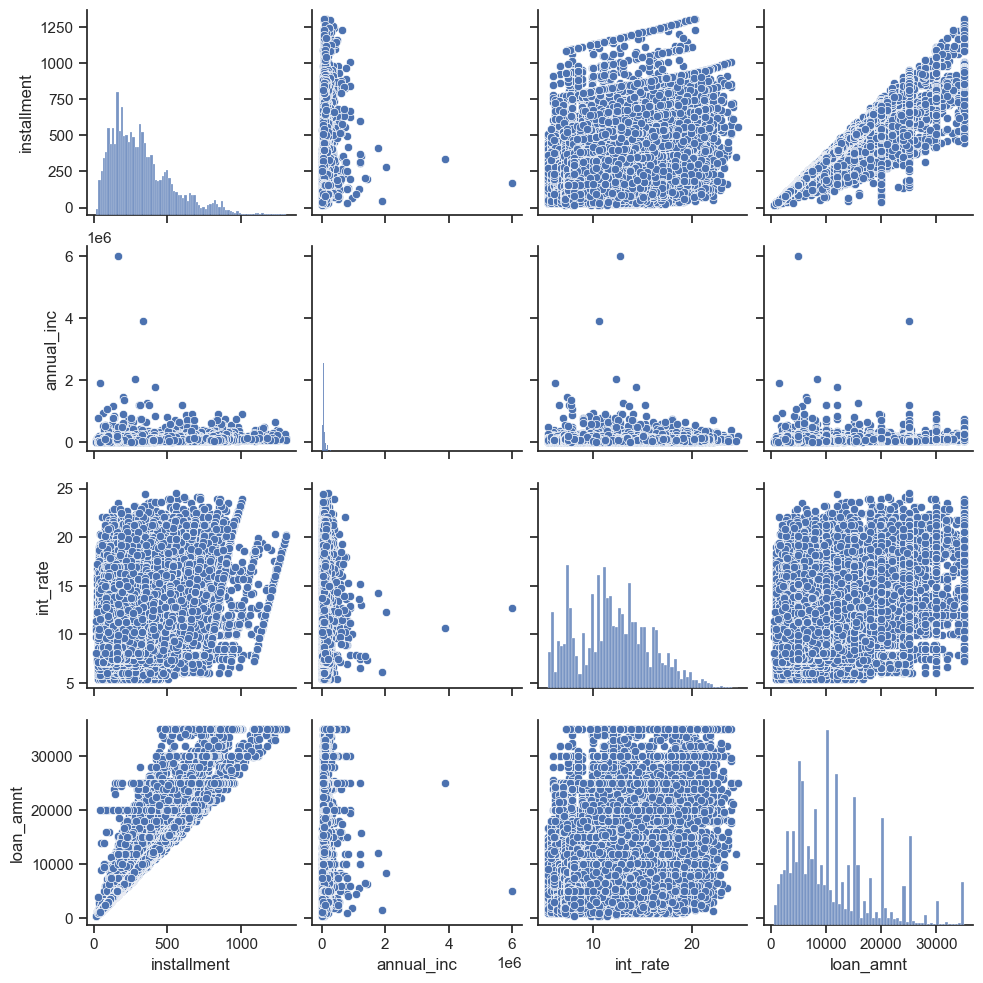

In [345]:
sns.pairplot(df_subset)

###### `loan_status`, `int_category`, `purpose`, `home_ownership` 

In [346]:
table = df.pivot_table(index=['loan_status', 'purpose', 'int_rate_category', 'term', 'home_ownership'], values=['annual_inc', 'loan_amnt'], aggfunc=np.median)

In [347]:
table.style.background_gradient(cmap=cm)

/Users/shaifali.jangra/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


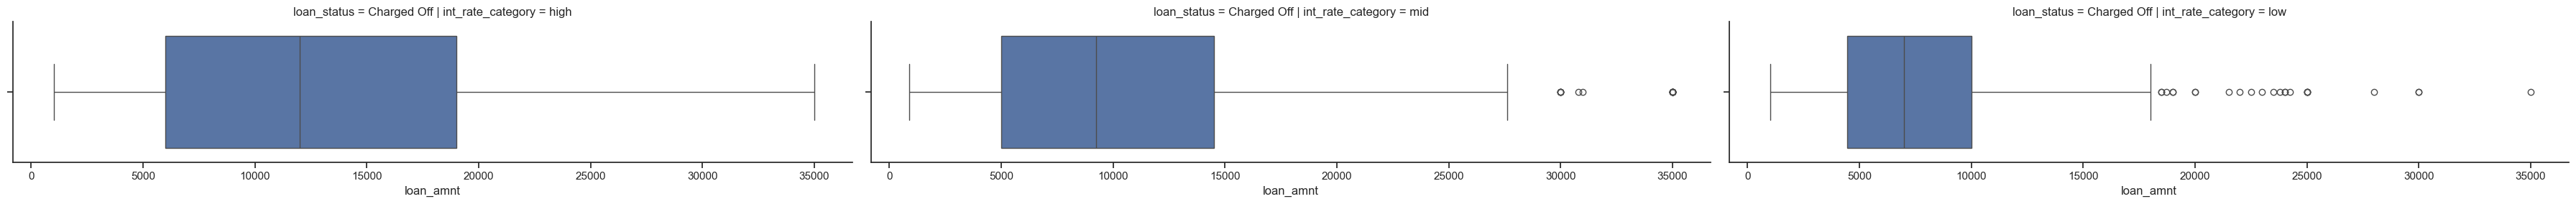

In [348]:
plot = sns.FacetGrid(df[df['loan_status'] == 'Charged Off'], row='loan_status', col='int_rate_category', height=3, aspect=4)
plot.map(sns.boxplot, "loan_amnt")


## Recommendations

1. Do more background check when when purpose is `debt_consolidation` and ready to take loan on higher int_rate, even when income is on lower side.
    * When purpose is `debt_consolidation`, people do full payment when interest rate is lower.
    * When purpose is `debt_consolidation`, people do better, full payment rate is higher when `loan amount` and `annual_inc` is lower.
2. When `income is low`, and people ready to take on `high` interest and high installment amount, they tend to default more, do more background check.
3. When people living on `RENT` tend to default more as they are ready to take loan on `high` interest rate, and `high` installment amount, and have low `annual_inc`.
    * Pople living on `RENT` do better when interate rate is `low` and installment amount is median of the current dataset.